<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [8]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


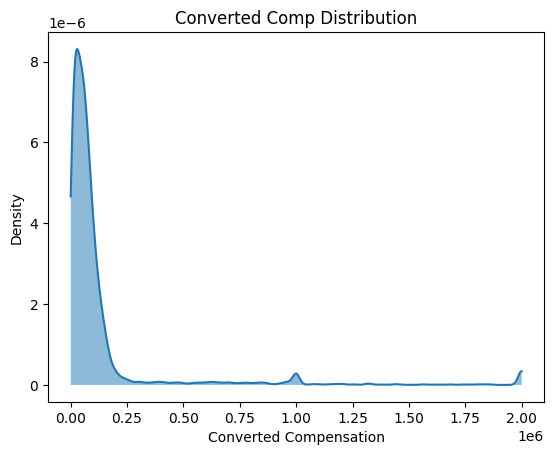

In [10]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

data = df['ConvertedComp'].dropna()  

kde = gaussian_kde(data)
kde.set_bandwidth(bw_method=kde.factor / 3.)


x_range = np.linspace(data.min(), data.max(), 500)


density = kde(x_range)

# Plotting
plt.plot(x_range, density)
plt.fill_between(x_range, density, alpha=0.5)
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.title('Converted Comp Distribution')
plt.show()

Plot the histogram for the column `ConvertedComp`.


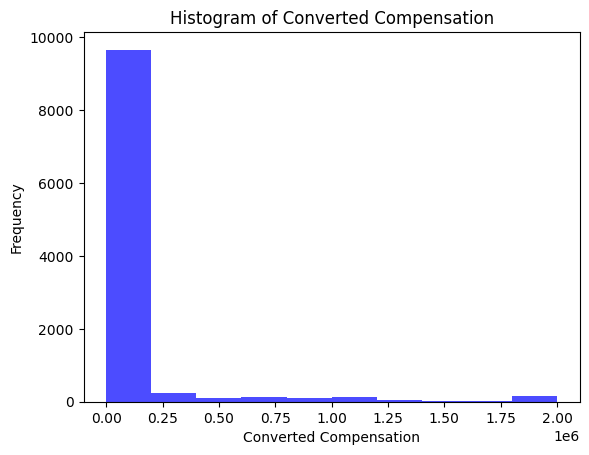

In [13]:
# your code goes here
data = df['ConvertedComp'].dropna()

plt.hist(data, bins=10, color='blue', alpha=0.7)
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print(median_converted_comp)

57745.0


How many responders identified themselves only as a **Man**?


In [20]:
# your code goes here
gender_counts = df['Gender'].value_counts()
men_count = gender_counts.get('Man',0)

print(men_count)

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
women_df = df[df['Gender'] == 'Woman']

median_converted_comp_woman = women_df['ConvertedComp'].median()

print("Women's median comp = ", median_converted_comp_woman)

Women's median comp =  57708.0


In [21]:
median_age = df['Age'].median()
print(median_age)

29.0


Give the five number summary for the column `Age`?


In [26]:
# your code goes here
summary = df['Age'].describe()
print(summary)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


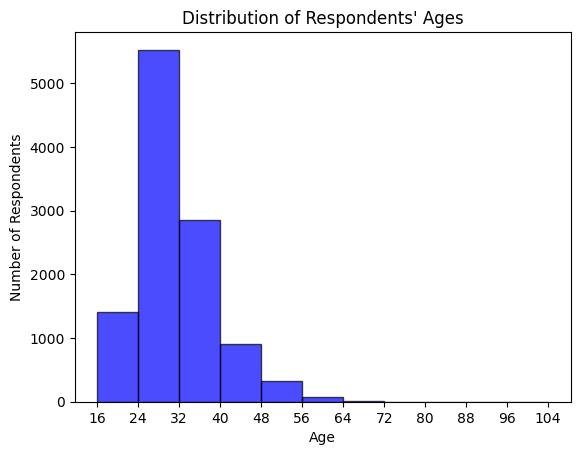

In [27]:
# your code goes here
ages = df['Age'].dropna()

start = 16
stop = ages.max() + 8 
step = 8


bins = range(start, int(stop), step)

plt.hist(ages, bins=bins, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Respondents\' Ages')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.xticks(bins) 
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


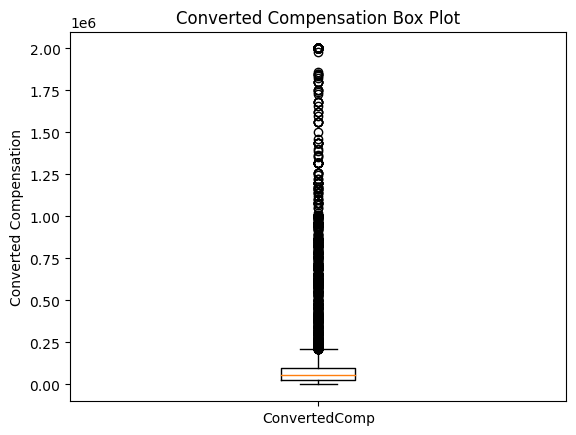

In [36]:
# your code goes here
plt.boxplot(df['ConvertedComp'].dropna())
plt.title("Converted Compensation Box Plot")
plt.ylabel("Converted Compensation")
plt.xticks([1], ['ConvertedComp'])

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [31]:
# your code goes here
q1 = df['ConvertedComp'].quantile(0.25)  # 25th percentile
q3 = df['ConvertedComp'].quantile(0.75)  # 75th percentile


IQR = q3 - q1

print(f"IQR: {IQR}")

IQR: 73132.0


Find out the upper and lower bounds.


In [32]:
# your code goes here
q1 = df['ConvertedComp'].quantile(0.25)  # 25th percentile (Q1)
q3 = df['ConvertedComp'].quantile(0.75)  # 75th percentile (Q3)

iqr = q3 - q1

factor = 1.5
lower_bound = q1 - (factor * iqr)
upper_bound = q3 + (factor * iqr)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [33]:
# your code goes here
# Assuming 'df' is your DataFrame and 'ConvertedComp' is the column of interest
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds to identify outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count of outliers
outliers_count = outliers['ConvertedComp'].count()

print(f"Number of outliers in 'ConvertedComp': {outliers_count}")

Number of outliers in 'ConvertedComp': 879


In [34]:
median_converted_comp = df['ConvertedComp'].median()
print(median_converted_comp, " Before outliers removed")

57745.0  Before outliers removed


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [37]:
# your code goes here
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


df_without_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(f"Original DataFrame rows: {len(df)}, New DataFrame rows: {len(df_without_outliers)}")

Original DataFrame rows: 11398, New DataFrame rows: 9703


In [39]:
mean_comp = df_without_outliers['ConvertedComp'].mean()
print(mean_comp)

59883.20838915799


In [40]:
median_comp = df_without_outliers['ConvertedComp'].median()
print(median_comp)

52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [41]:
# your code goes here
correlation_matrix = df_without_outliers.corr()

# Extracting the correlation values of 'Age' with all other numerical columns
age_correlations = correlation_matrix['Age']


print("Correlation of 'Age' with other numerical columns:")
print(age_correlations)

<ipython-input-41-a8bf8745b414>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_without_outliers.corr()


Correlation of 'Age' with other numerical columns:
Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
